In [ ]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', 'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')

                    for file in os.listdir():
                        if file.endswith(".json"):

                            version_tmp = load_json_summary(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]

                    os.chdir(dirs[0])

                    version_fulltable = load_busco_fulltable('full_table.tsv', group=group, organism=organism, genome_version=genome_version)

                    os.chdir('../..')
                    
                    #karyoplot(karyotype_file='karyotype.tsv',
                    #          busco_fulltable=version_fulltable,
                    #          output_file='karyoplot.png',
                    #          title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                    #          chrs_limit=100,
                    #          dpi=300)
                    os.chdir('..')

            #organism_busco_barplot(df=organism_tmp,
            #                       out_path="./",
            #                       filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    #organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

Metaeuk karyoplot

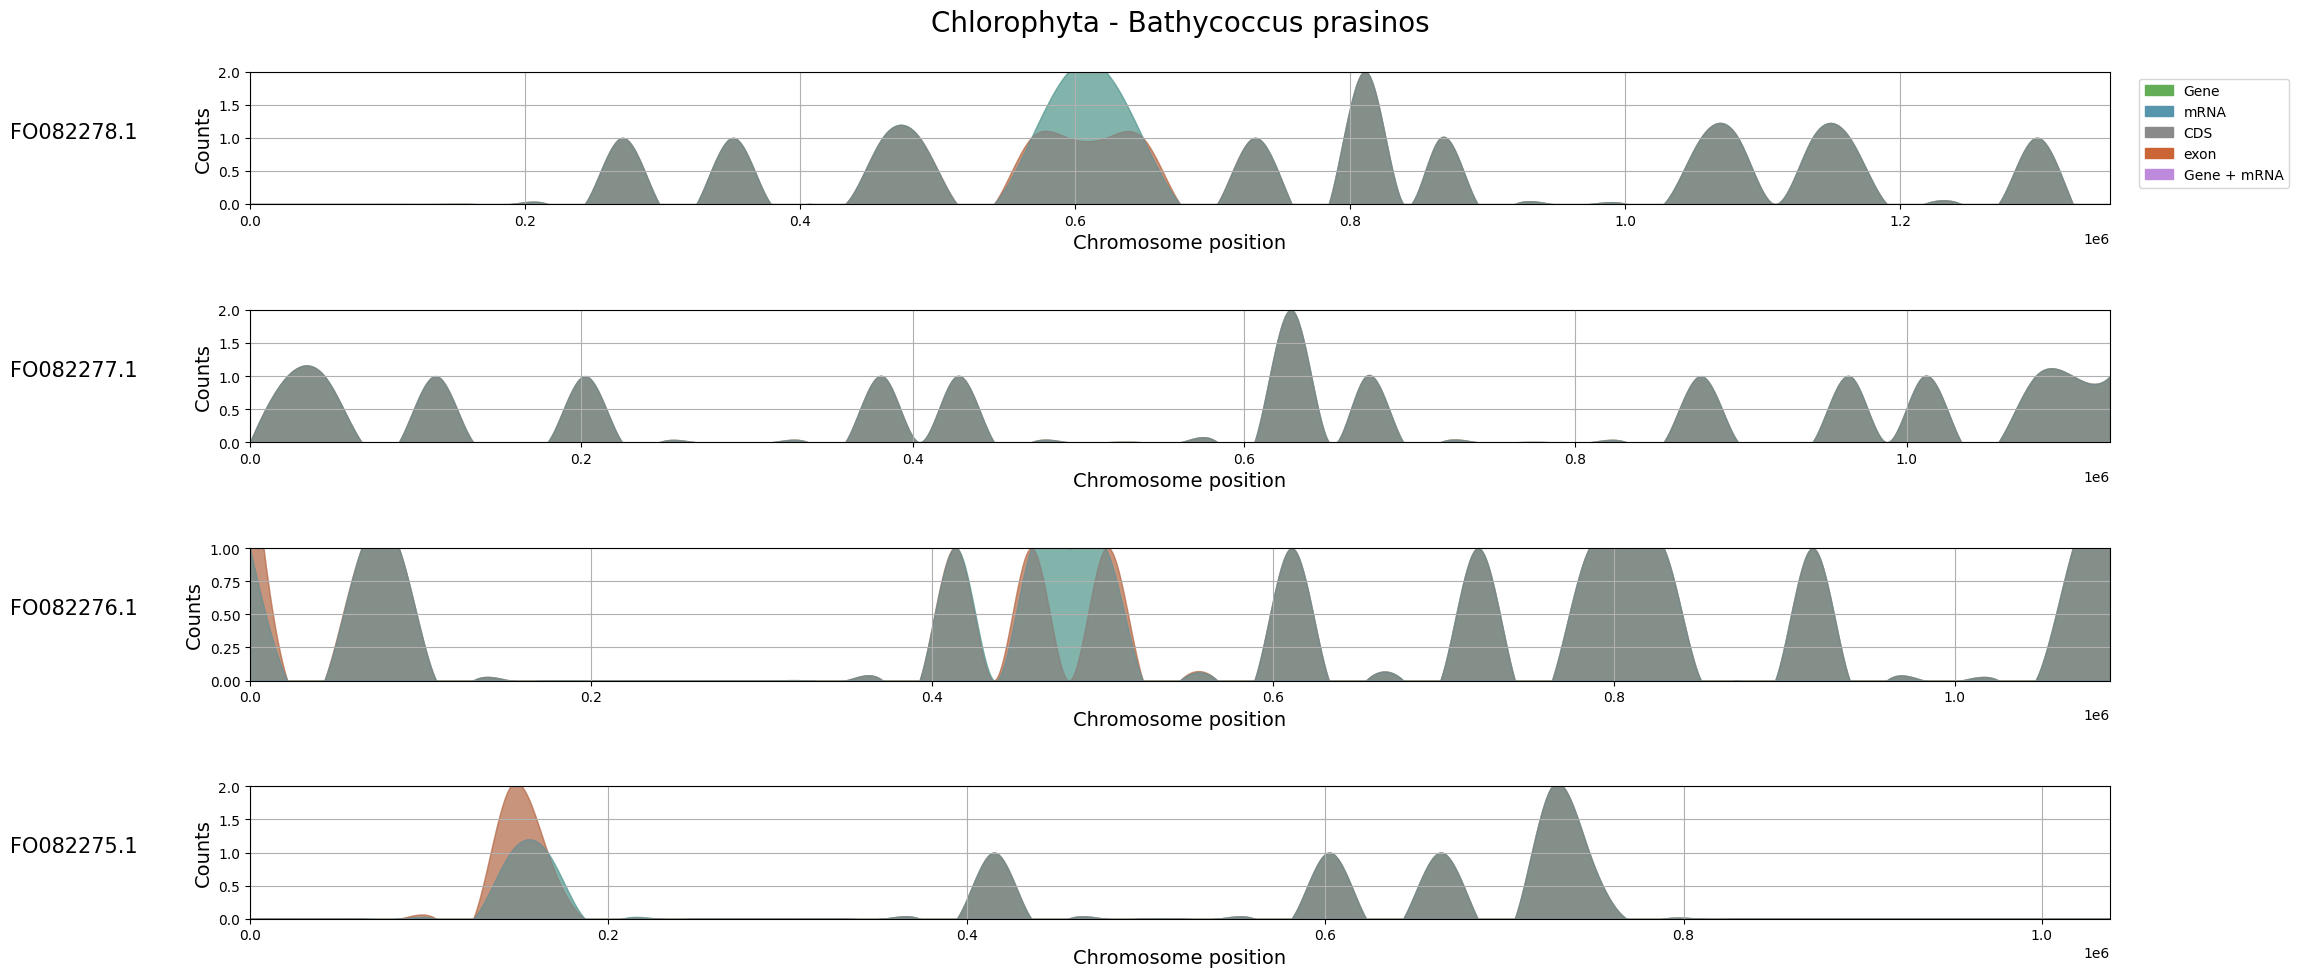

In [3]:
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates
from buscoplotpy.graphics.chromoplot import chromoplot
import pandas as pd

karyo = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
genes = load_metaeuk_coordinates('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/metaeuk_output/rerun_results/GCA_002220235.1_ASM222023v1_genomic.fna.gff')

chromoplot(karyotype=karyo[:4], 
           genes_dataframe=genes, 
           bin_number=50, 
           title='Chlorophyta - Bathycoccus prasinos',
           output_path='chromoplot.png', 
           plt_show=True, targets=['gene', 'CDS', 'exon', 'mRNA']
)

Il pacchetto è stato importato!


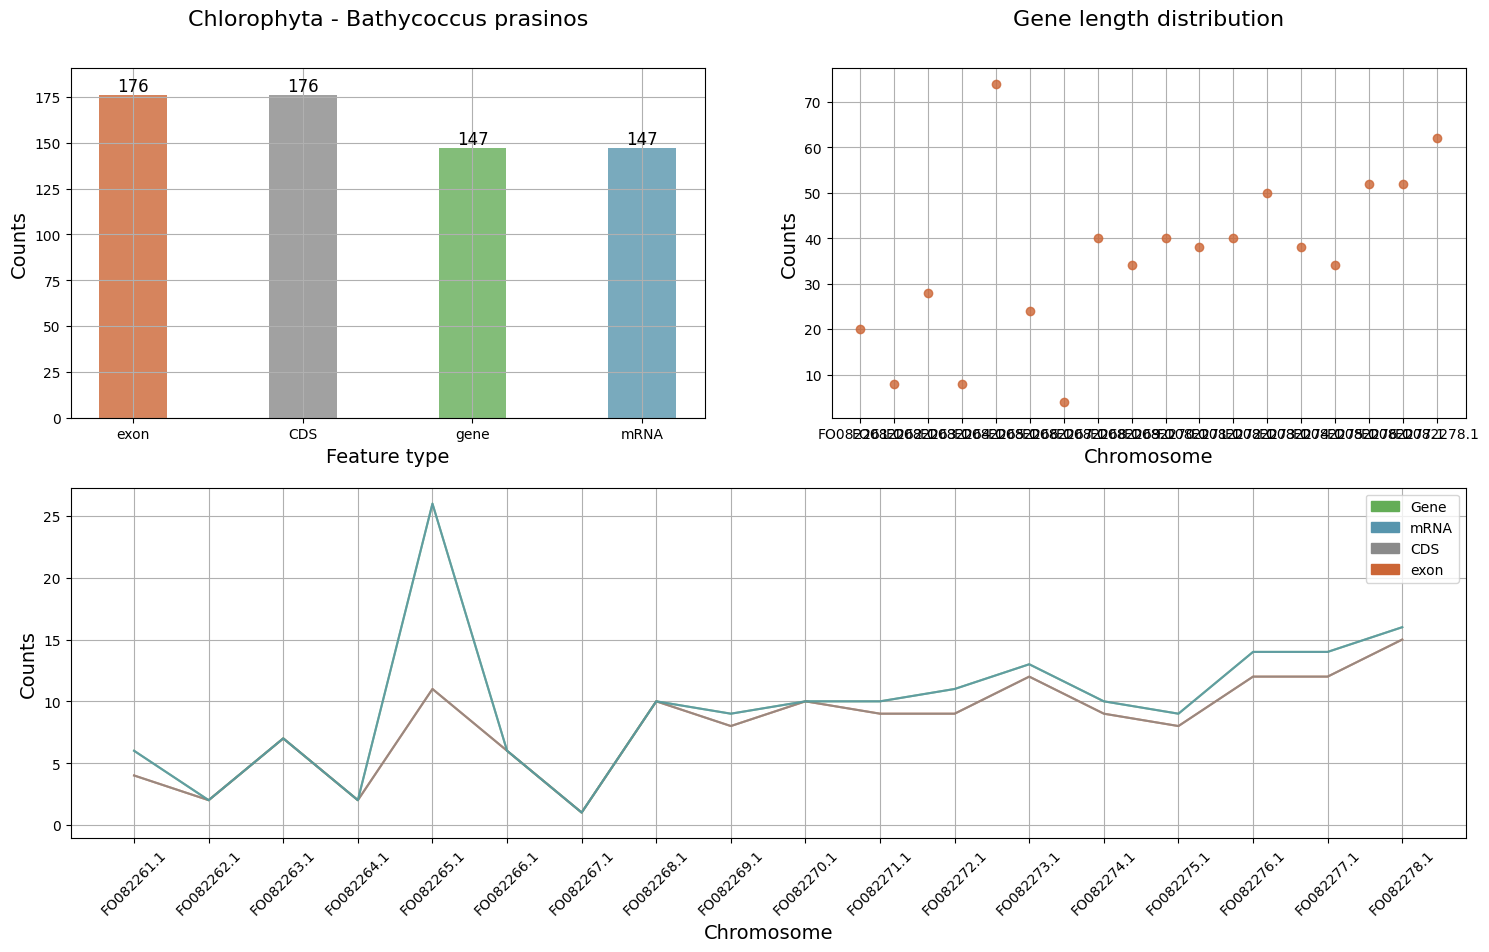

In [1]:
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates
from buscoplotpy.graphics.chromoplot import chromoplot_details
import pandas as pd

karyo = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
genes = load_metaeuk_coordinates('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/metaeuk_output/rerun_results/GCA_002220235.1_ASM222023v1_genomic.fna.gff')

chromoplot_details(genes_dataframe=genes, 
                   title='Chlorophyta - Bathycoccus prasinos',
                   output_path='test.png', 
                   plt_show=True
)

In [ ]:
import pandas as pd
import os
import re
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates

%matplotlib inline

# Insert the filename of the graph
filename = "metaeuk_results"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree"

directories = ['Alveolata', ]#'Chlorophyta', 'Euglenozoa', 'Stramenopiles']

busco_run_pattern = r'run*'

# Iterate on each superphylum group
for group in directories:
    os.chdir(dir + '/' + group)

    group_tmp = pd.DataFrame()

    # Iterate on each organism
    for organism in os.listdir():
            
        if os.path.isdir(organism):

            os.chdir(organism)

            # Create an empty dataframe
            organism_tmp = pd.DataFrame()

            # Iterate on each genome version
            for genome_version in os.listdir():

                if os.path.isdir(genome_version):
                    os.chdir(genome_version)
                    os.chdir('./busco_out')
                    dirs = [d for d in os.listdir() if re.search(busco_run_pattern, d)]
                    
                    # We are now in run* directory
                    os.chdir(dirs[0])


                    for file in os.listdir('./metaeuk_output/rerun_results'):
                        if file.endswith(".gff"):

                            version_tmp = load_metaeuk_coordinates(file)
                            version_tmp['group'] = group
                            version_tmp['organism'] = organism
                            version_tmp['version'] = genome_version

                            organism_tmp = pd.concat([organism_tmp, version_tmp], axis=0, ignore_index=True)

                    ############# Warning ###################
                    os.chdir('../..')
                    
                    #karyoplot(karyotype_file='karyotype.tsv',
                    #          busco_fulltable=version_fulltable,
                    #          output_file='karyoplot.png',
                    #          title=group + ' ' + organism + ' ' + genome_version + ' karyotype',
                    #          chrs_limit=100,
                    #          dpi=300)
                    os.chdir('..')

            #organism_busco_barplot(df=organism_tmp,
            #                       out_path="./",
            #                       filename=filename)
                
            group_tmp = pd.concat([group_tmp, organism_tmp], axis=0, ignore_index=True)

            os.chdir('..')

    #organism_busco_barplot(df=group_tmp, out_path="./", filename=filename + '_all')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 95.0], out_path="./", filename=filename + '_upto95')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 90.0], out_path="./", filename=filename + '_upto90')
    #organism_busco_barplot(df=group_tmp[group_tmp['complete'] >= 85.0], out_path="./", filename=filename + '_upto85')
    os.chdir('..')

BUSCO's barplot

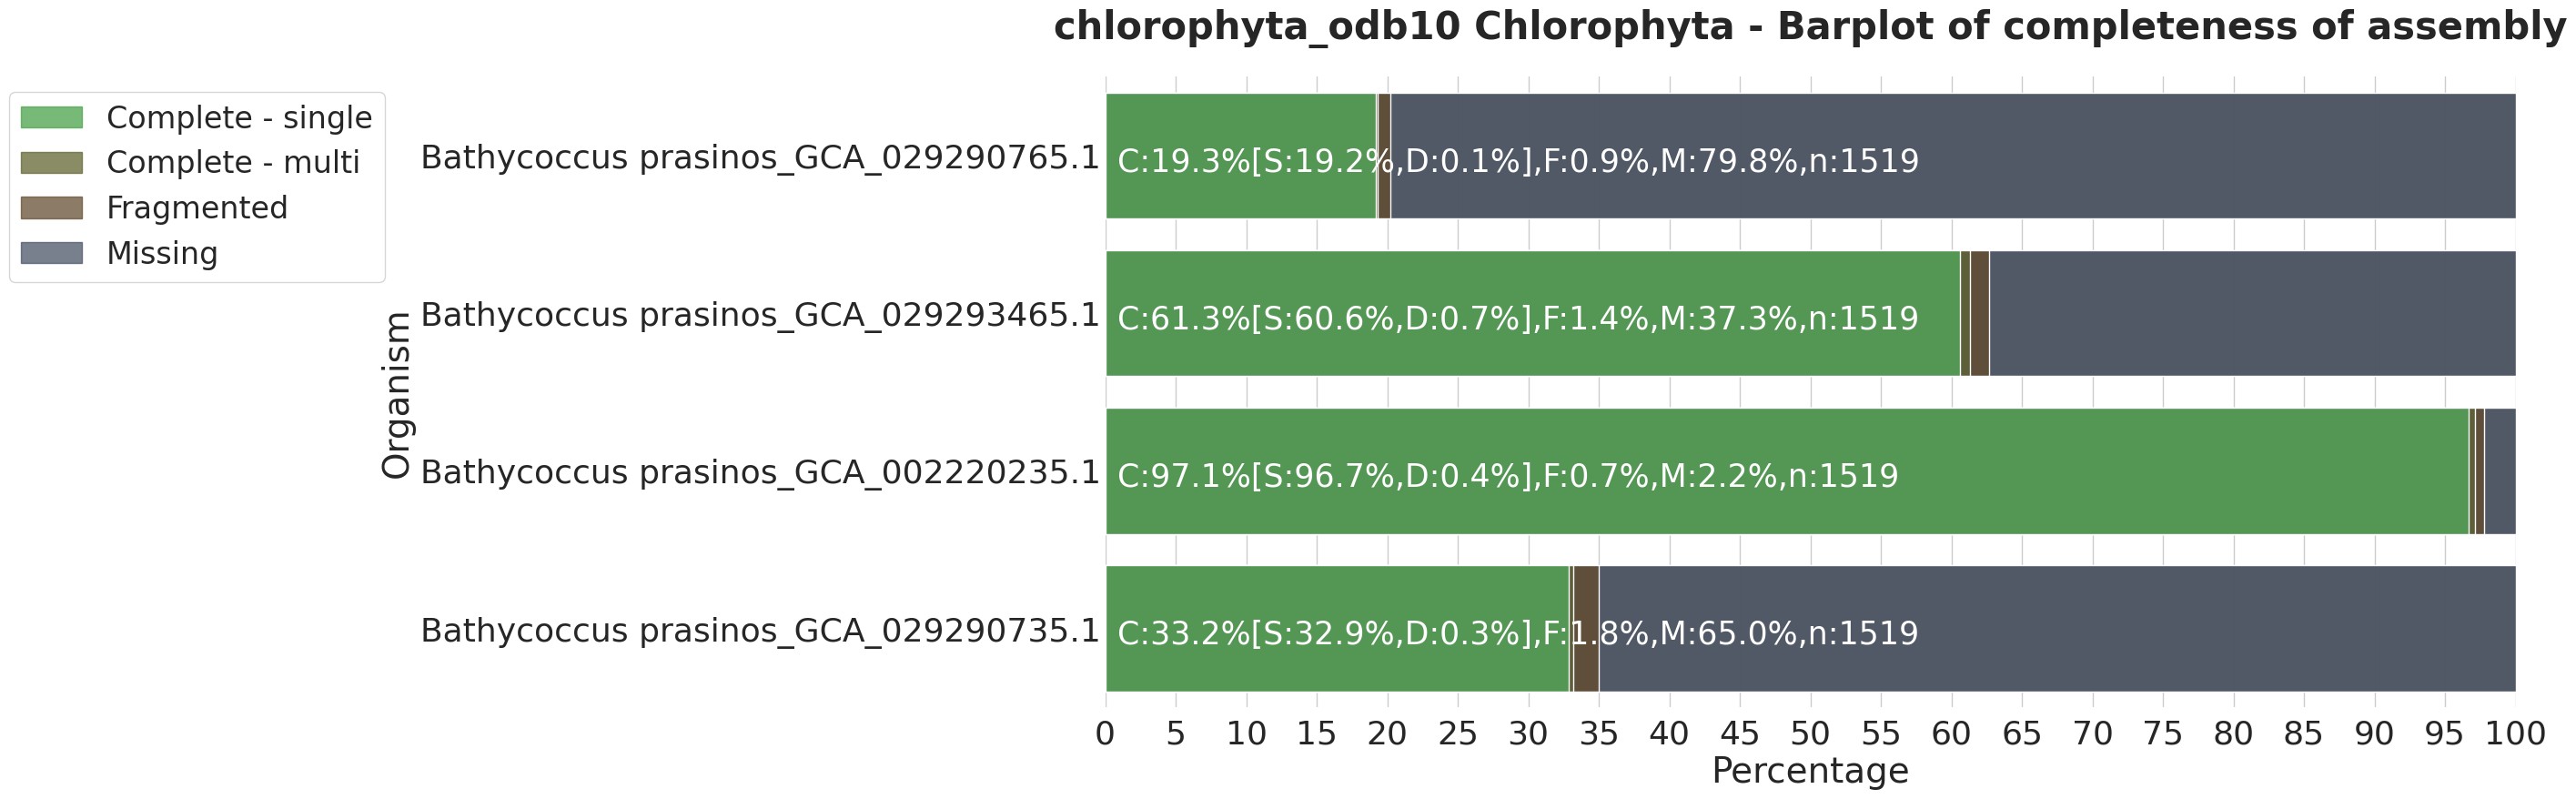

In [3]:
# Importing libraries

import pandas as pd
import os
import json
import re
from buscoplotpy.graphics.organism_busco_barplot import organism_busco_barplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_json_summary import load_json_summary
from buscoplotpy.graphics.karyoplot import karyoplot

%matplotlib inline

# Insert the filename of the graph
filename = "BUSCO_barplot"

# Input directory
dir = "/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4"

df = pd.DataFrame()

for version in os.listdir(dir):
    if os.path.isdir(dir + '/' + version):
        os.chdir(dir + '/' + version)
        os.chdir('./busco_out')
        for f in os.listdir():
            if f.endswith(".json"):
                summary = load_json_summary(f)
                summary['version'] = version
                df = pd.concat([df, summary], axis=0, ignore_index=True)
        os.chdir('../..')
os.chdir('/home/lorenzo/Documenti/GitHub/BUSCO-Plot-Py/images')
df['group'] = 'Chlorophyta'
df['organism'] = 'Bathycoccus prasinos'
organism_busco_barplot(df=df, plt_show=True, filename=filename, out_path="./", dpi=200)

Il pacchetto è stato importato!
X_lim: 100 Y_lim: 49 dim: 9.8


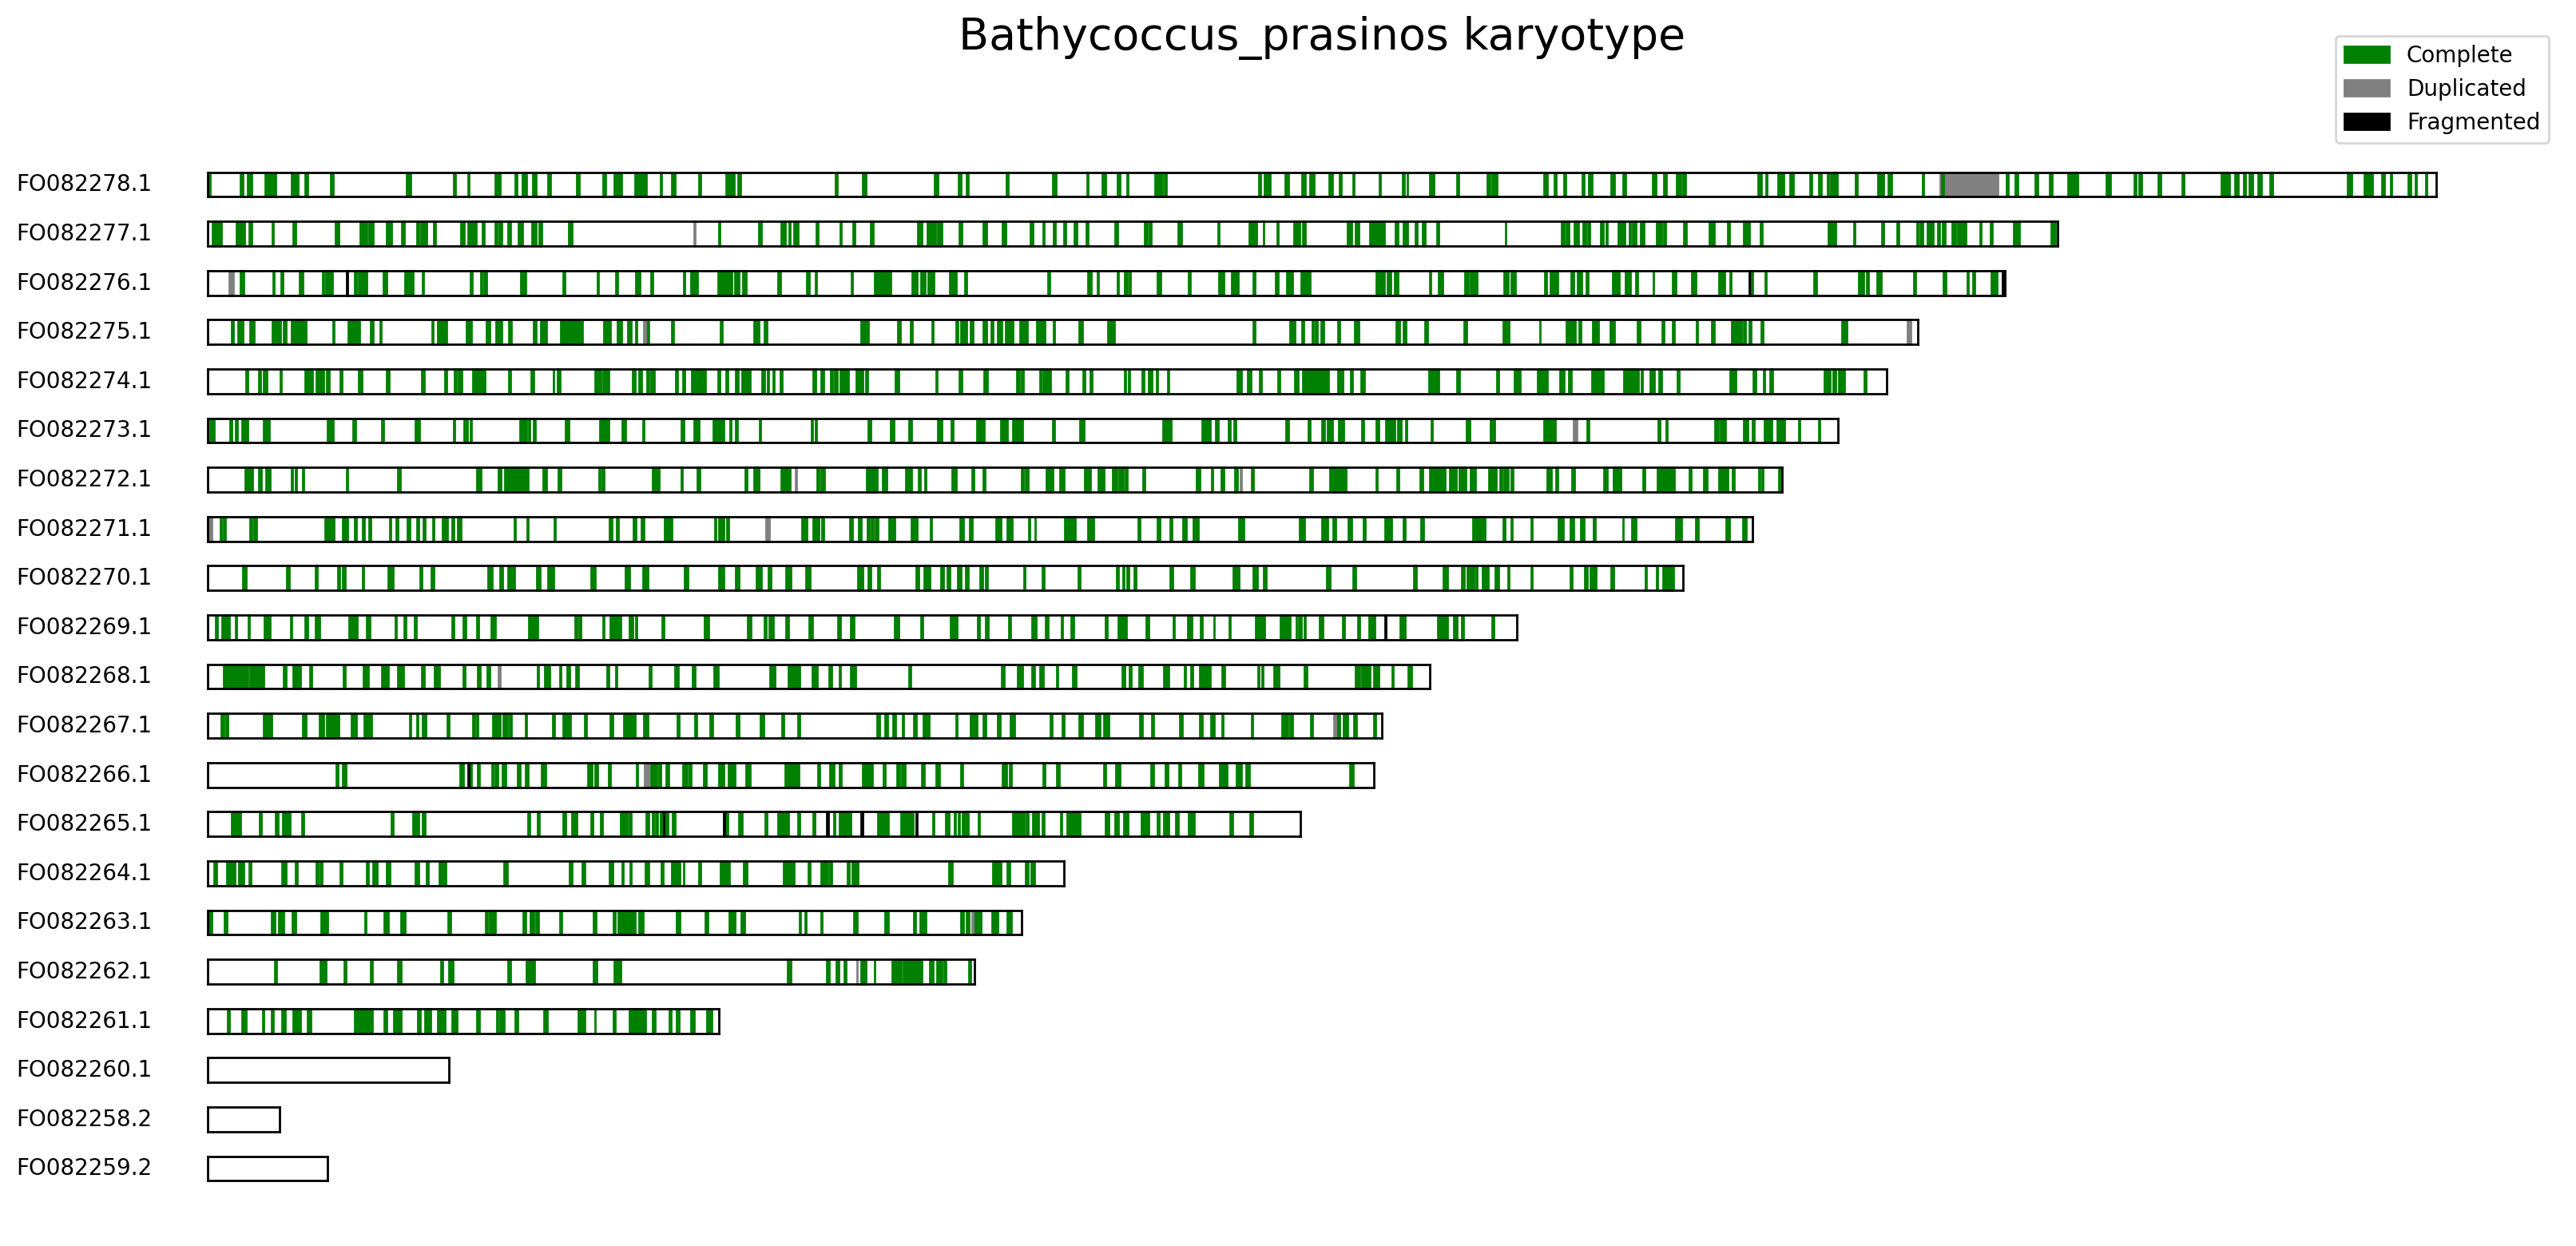

X_lim: 100 Y_lim: 49 dim: 9.8


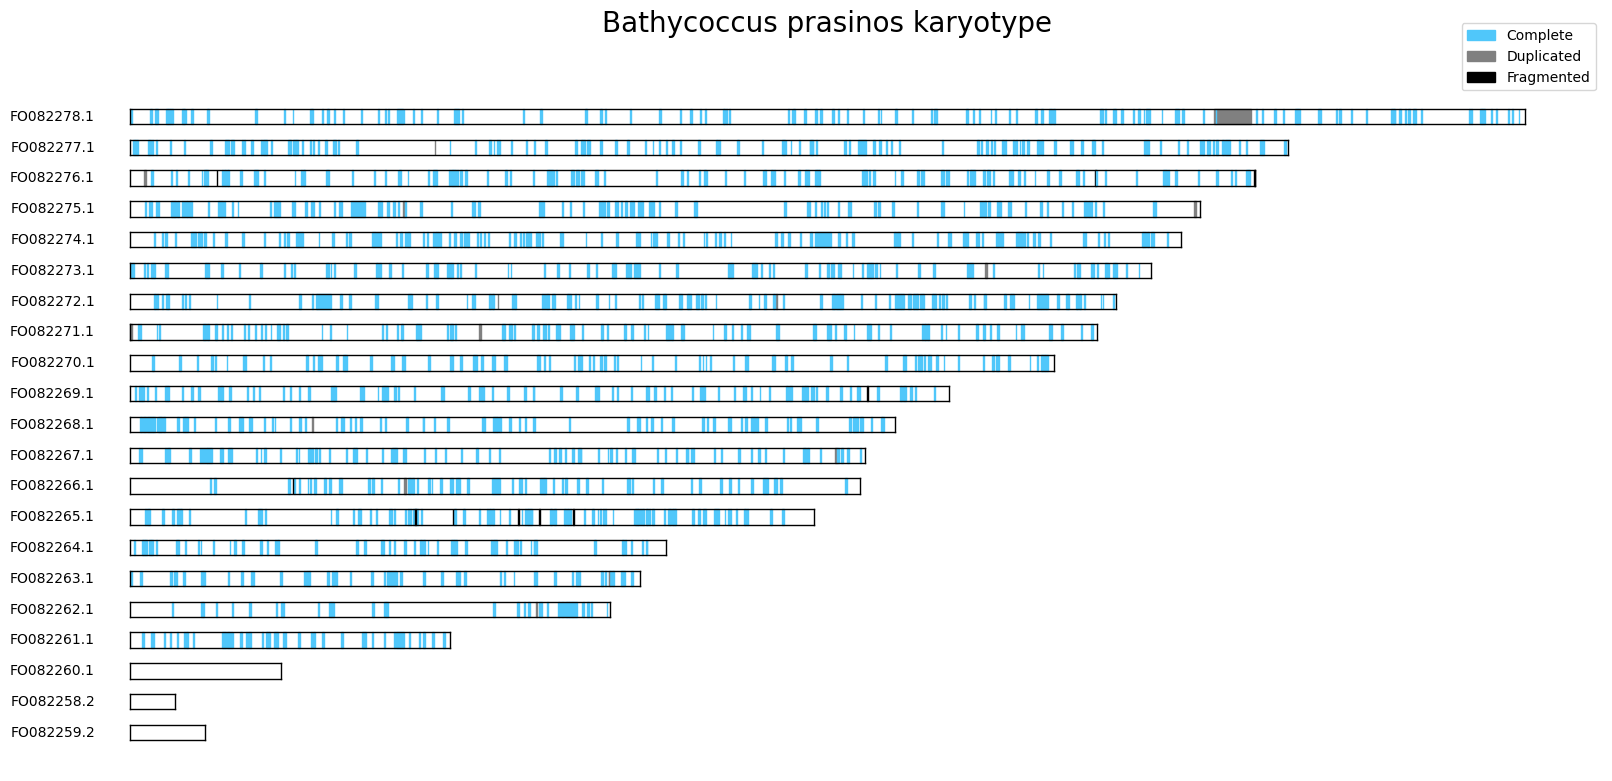

In [1]:
from buscoplotpy.graphics.karyoplot import karyoplot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
from buscoplotpy.utils.load_metaeuk_coordinates import load_metaeuk_coordinates
import pandas as pd

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Chloropicon_primus_/GCA_023205875.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Chloropicon primus'

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Bathycoccus_prasinos'

karyoplot(karyotype=karyotype,
          fulltable=full_table,
          title='karyotype',
          chrs_limit=500,
          dpi=200,
          plt_show=True,
          dim=2,
          #output_file='karyoplot1.png',
)

full_table = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')
karyotype  = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype['organism'] = 'Bathycoccus prasinos'

karyoplot(karyotype=karyotype,
          fulltable=full_table,
          title='karyotype',
          chrs_limit=500,
          dpi=100,
          plt_show=True,
          dim=2,
          palette='azure',
          output_file='karyoplot2.png',
)

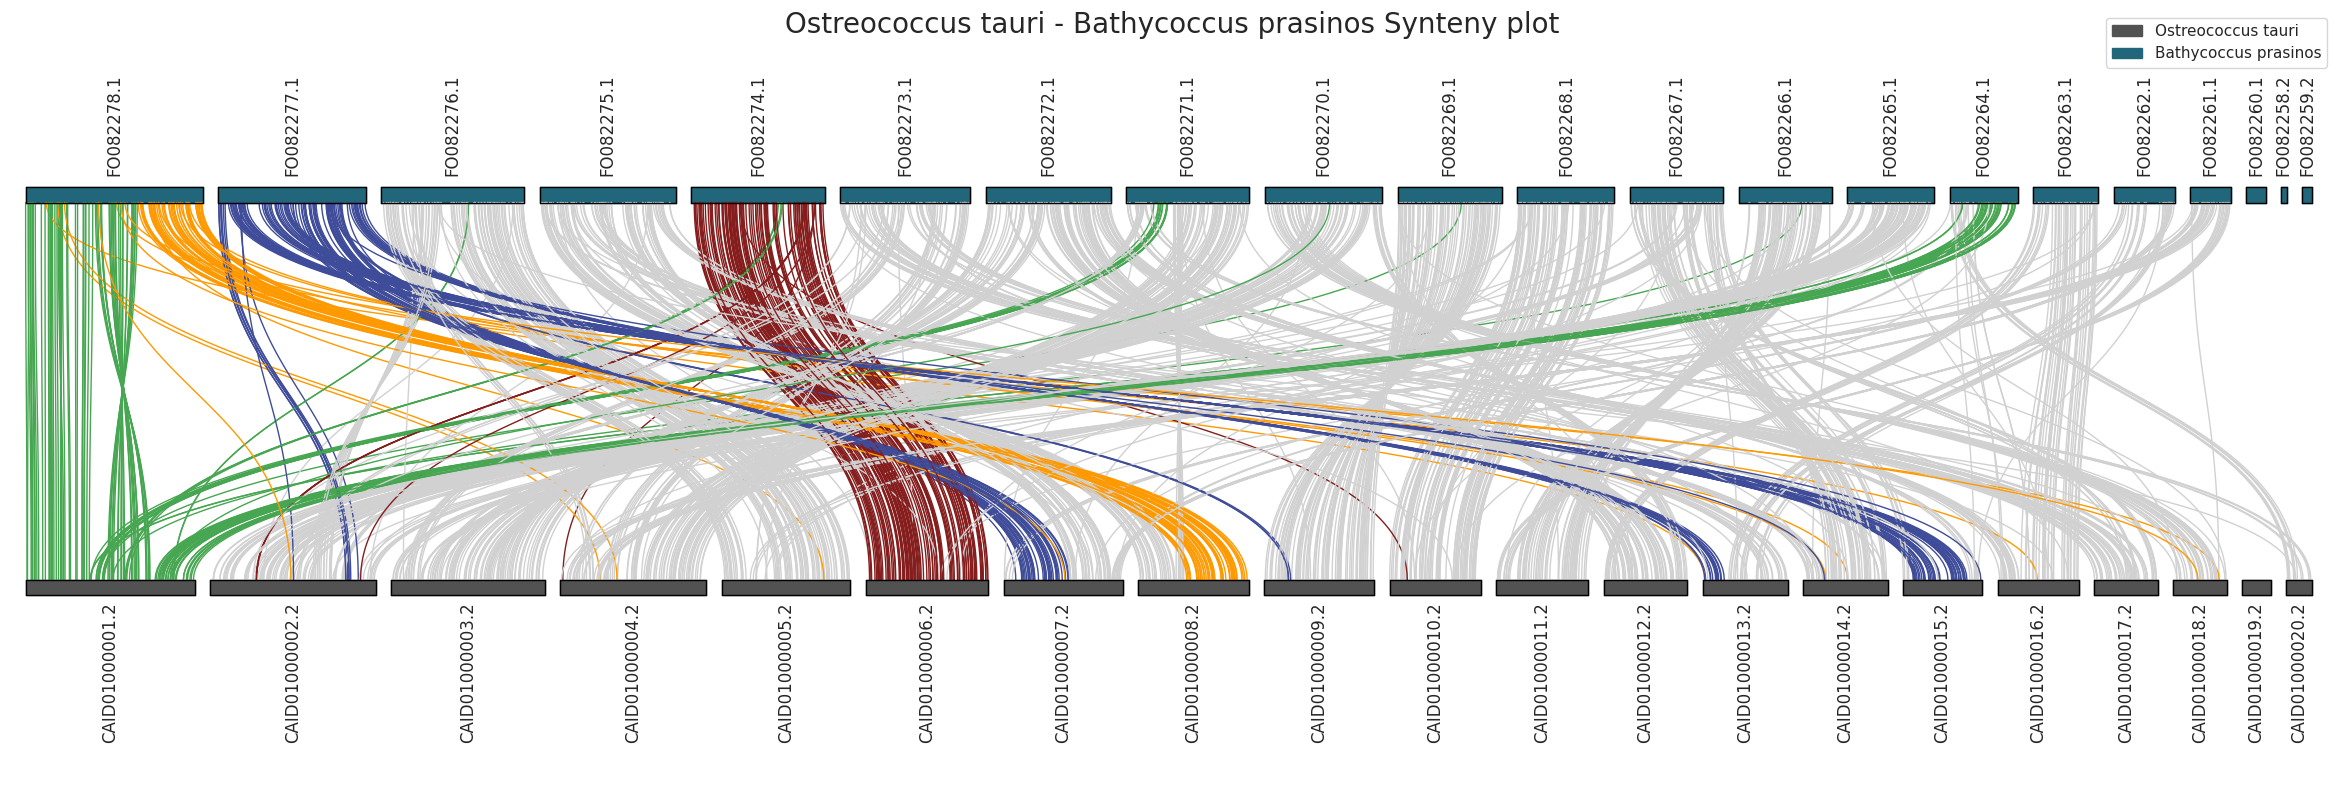

In [6]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

horizontal_synteny_plot(ft_1=ft_1, ft_2=ft_2, 
                        karyotype_1=karyotype_1, 
                        karyotype_2=karyotype_2, 
                        dim=2, figsize=(30, 10), 
                        link_colors=link_colors, 
                        round_edges=False, dpi=100, 
                        straight_line=False,
                        output_path='synteny.png',
                        bbox_inches='tight',
                        plt_show=True)

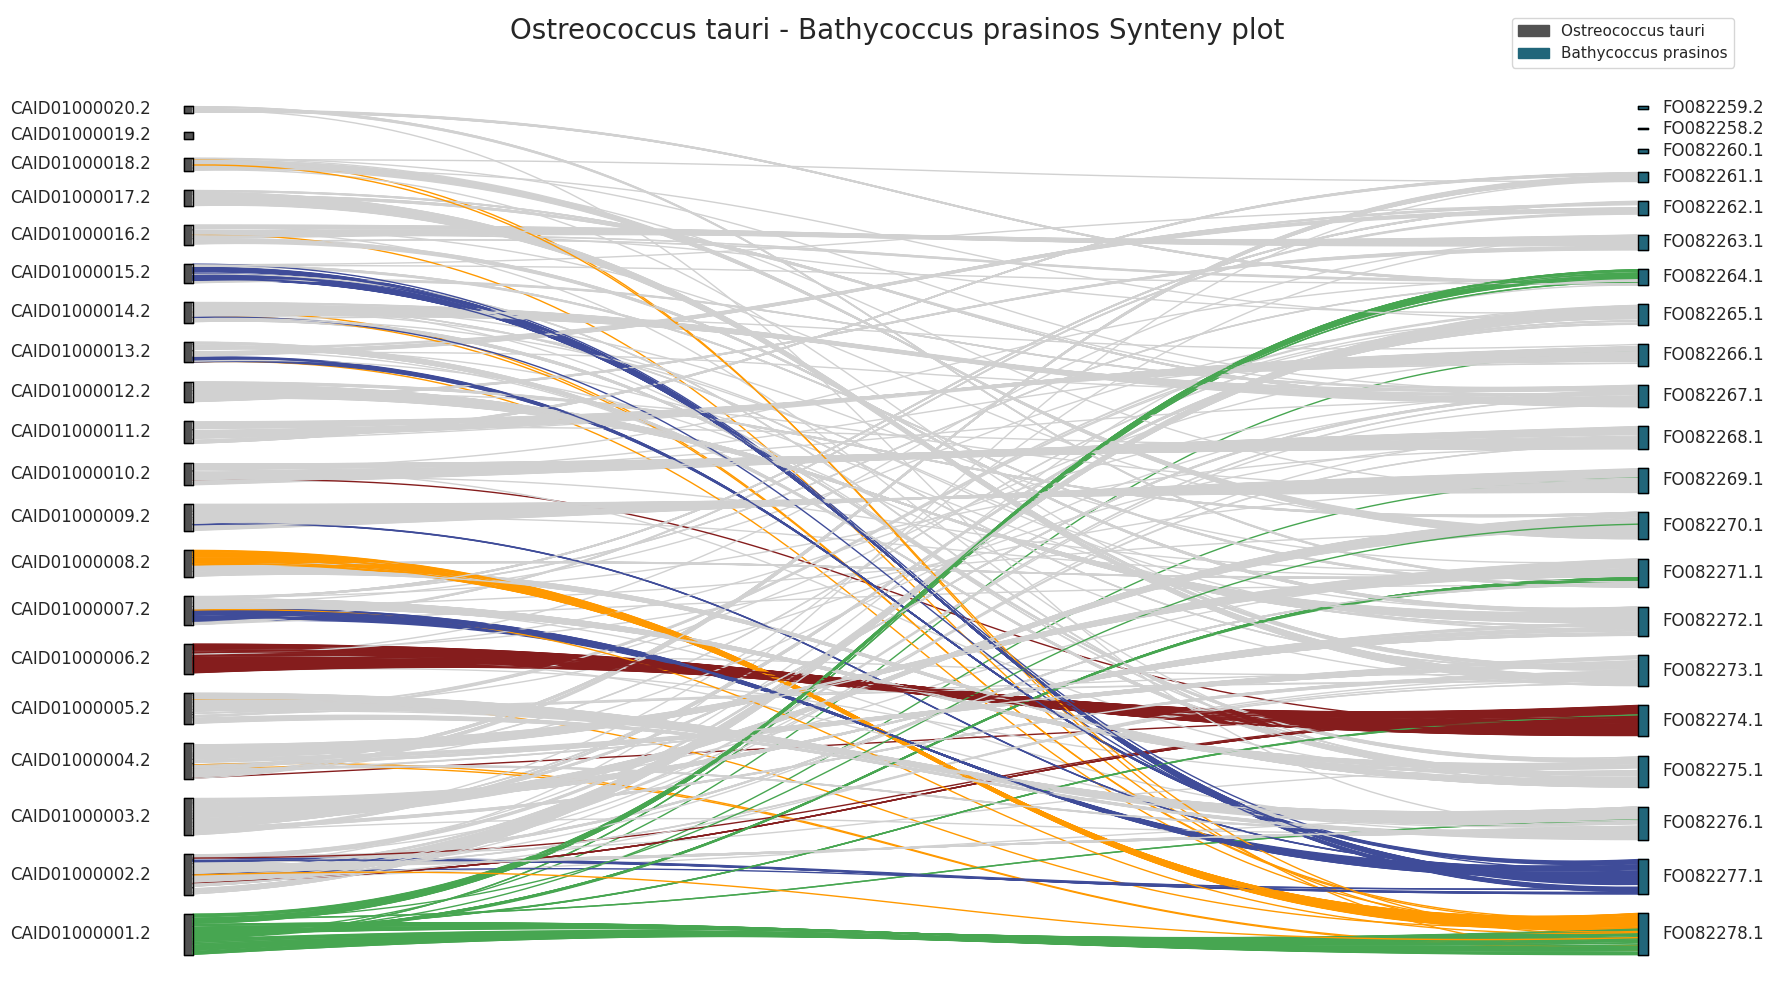

In [7]:
from buscoplotpy.graphics.synteny import horizontal_synteny_plot, vertical_synteny_plot
from buscoplotpy.utils.load_busco_fulltable import load_busco_fulltable
import pandas as pd


karyotype_1 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/karyotype.tsv', sep='\t')
karyotype_1['organism'] = 'Ostreococcus tauri'

ft_1 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Ostreococcus_tauri/GCA_000214015.2/busco_out/run_chlorophyta_odb10/full_table.tsv')

karyotype_2 = pd.read_csv('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/karyotype.tsv', sep='\t')
karyotype_2['organism'] = 'Bathycoccus prasinos'

ft_2 = load_busco_fulltable('/home/lorenzo/Documenti/bioswiftanalytics_test_data/busco_tmp/tree/Chlorophyta/Bathycoccus_prasinos_4/GCA_002220235.1/busco_out/run_chlorophyta_odb10/full_table.tsv')

link_colors = {
    'CAID01000001.2': '#47a651',
    'FO082277.1': '#3f4c99',
    'FO082274.1': '#851d1d',
    'FO082278.1': '#ff9900',
}

vertical_synteny_plot(ft_1=ft_1, ft_2=ft_2, karyotype_1=karyotype_1, karyotype_2=karyotype_2, dim=1, figsize=(18, 10), link_colors=link_colors, dpi=100, straight_line=False, output_path='Vsynteny.png', plt_show=True)